# Value-at-Risk for Stocks: Delta-Normal Approach

### Lecture Notes by Jakov Ivan S. Dumbrique (jdumbrique@ateneo.edu)

MATH 100.2: Topics in Financial Mathematics II \
First Semester, S.Y. 2020-2021 \
Ateneo de Manila University

In [5]:
import numpy as np # Numerical Computing
import pandas as pd # Data wrangling
import matplotlib.pyplot as plt # Plotting
from statistics import NormalDist # statistical analysis

%matplotlib inline

## Are stock returns normally distributed?
The Delta-Normal Approach assumes that the daily returns $R_t$ are normally distributed with mean 0 and variance $\sigma^2$. Is this a good assumption? Does the assumption of normality understate, properly state, or overstate the frequency of market disasters?

Let's look at the TEL data and plot it.

In [7]:
data_path = "https://raw.githubusercontent.com/ateneomathdept/math100.2_2021Sem1/main/data/lectures/TEL_2018.csv"
TEL_df = pd.read_csv(data_path, index_col="dt")
TEL_df

,close
dt,
2/23/18,1488.74
2/22/18,1510.86
2/21/18,1513.72
2/20/18,1536.65
2/16/18,1476.37
...,...
3/2/17,1430.29
3/1/17,1408.94
2/28/17,1394.35


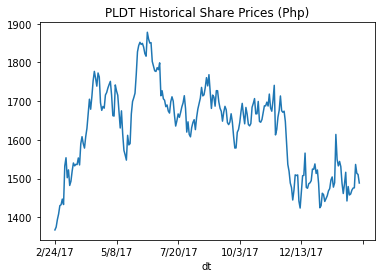

In [10]:
TEL_df["close"][::-1].plot() #pd.Series
plt.title("PLDT Historical Share Prices (Php)")
plt.show()

Let $S_t$ denote the value of the stock at time $t$. The one-day continuous return $R_t$ of the stock is given by
$$R_t = \ln\left(\frac{P_t}{P_{t-1}}\right).$$

In [9]:
TEL_df["close"].shift(-1)

dt
2/23/18    1510.86
2/22/18    1513.72
2/21/18    1536.65
2/20/18    1476.37
2/16/18    1475.71
            ...   
3/2/17     1408.94
3/1/17     1394.35
2/28/17    1374.93
2/27/17    1367.68
2/24/17        NaN
Name: close, Length: 248, dtype: float64

In [10]:
# creates a new column that shifts the prices d values up (or -d values down)
TEL_df["previous"] = TEL_df["close"].shift(-1)
TEL_df

,close,previous
dt,,
2/23/18,1488.74,1510.86
2/22/18,1510.86,1513.72
2/21/18,1513.72,1536.65
2/20/18,1536.65,1476.37
2/16/18,1476.37,1475.71
...,...,...
3/2/17,1430.29,1408.94
3/1/17,1408.94,1394.35
2/28/17,1394.35,1374.93


In [11]:
def get_return(df):
    return np.log(df["close"]/df["previous"])

In [15]:
TEL_df["return"] = TEL_df.apply(get_return, axis=1)
TEL_df

,close,previous,return
dt,,,
2/23/18,1488.74,1510.86,-0.014749
2/22/18,1510.86,1513.72,-0.001891
2/21/18,1513.72,1536.65,-0.015035
2/20/18,1536.65,1476.37,0.040018
2/16/18,1476.37,1475.71,0.000447
...,...,...,...
3/2/17,1430.29,1408.94,0.015040
3/1/17,1408.94,1394.35,0.010409
2/28/17,1394.35,1374.93,0.014026


Let's fit a normal distribution to the data, and plot the histogram of data against it.

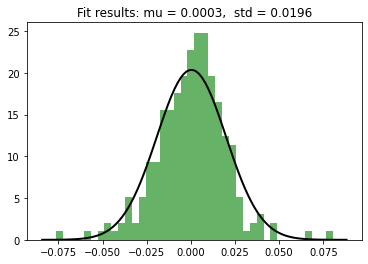

In [22]:
from scipy.stats import norm # statistical analysis
# Get data, drop the last row with nan value (not a number)
data = TEL_df["return"].dropna()

# Fit a normal distribution to the data:
mu, std = norm.fit(data) # provides MLE of the parameters for the Gaussian curve which has the highest likelihood of fitting our dataset 

# Plot the histogram.
plt.hist(data, bins=40, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim() # gets the left and right limits of the x-axis of the current plot
x = np.linspace(xmin, xmax, 100) # array of 100 evenly-spaced numbers in the interval (xmin, xmax)
p = norm.pdf(x, mu, std) # array 
plt.plot(x, p, 'k', linewidth=2) # k for black
title = "Fit results: mu = %.4f,  std = %.4f" % (mu, std)
plt.title(title)

plt.show()

The distribution looks approximately normal. Furthermore, the resulting MLE for the Gaussian mean is close to 0. Thus, by eyeballing, the normal distribution might be a good fit for the stock returns.

However, if we  look to the extreme left and right of the histogram distribution, we can see the famous fat tails. The fat tails mean that extreme events occur more frequently in reality than what a normal distribution would predict. More evidence of that is how the actual distribution of daily TEL returns is skinnier in its center than the normal distribution. The skinny middle and the fat tails imply that the normal distribution might not be the best distribution to describe the stock returns. This fat-tail distribution is common among stock returns calculated from real data. To more accurately model the stock returns, researchers consider 2 regimes — a calm regime where we spend most of the time that is normally distributed (but with a lower volatility) and a regime with high volatility and extreme (sometimes terrible) returns.

Nonethless, we cannot neglect that the normal distribution is still a good one to use. Practioners use the normal distribution as starting point for modelling stock returns as this is simple to use and implement. Any time we can model something with normal distributions, it makes life a lot easier. For example, the return of a portfolio consisting of many investments (each with normally distributed returns) is also normally distributed. And to describe an investment, we only need 2 values: the mean (a.k.a. the investment’s expected return) and the standard deviation (a.k.a. the investment’s risk). If we want to be thorough, we should also record the investment’s correlation with our overall portfolio.

There are other statistical ways to check normality of the daily returns, and not just to eyeball:
1. [QQ plot](https://towardsdatascience.com/what-in-the-world-are-qq-plots-20d0e41dece1)
2. [Jarque-Bera Normality test](https://www.statisticshowto.com/jarque-bera-test/)

Reference: https://towardsdatascience.com/are-stock-returns-normally-distributed-e0388d71267e

## VaR for Stocks: Single-Asset Portfolio

Consider a single-asset portfolio consisting of a long position on $N$ shares of a stock with current price $S_0$. Let $\Delta P$ denote the change in portfolio value.

The **1-day 99\% VaR** of the portfolio is the number $|V|$ such that 
$$\mathbb{P}[\Delta P\geq V] = 0.99.$$ 
This is given by

\begin{equation}
\text{VaR}_{0.99} = |V| = NS_0\sigma\Phi^{-1}(0.99).
\end{equation}

**The 1-day 99\% VaR  is 1M pesos.**

There is 99% level of confidence that the loss of the portfolio will not exceed 1M pesos over the next trading day.

### Exercise 1:
A portfolio consists of Php 10,000,000 worth of shares of stock A. Assume that the daily volatility is 2%. What is the portfolio's one-day 99% VaR? 

In [16]:
portval = 10000000 # N*S_0
sigma = 0.02
alpha = 0.99

quantile = NormalDist().inv_cdf(alpha)
var = portval * sigma *quantile
round(var, 4)

465269.5748

In [17]:
quantile

2.3263478740408408

### Exercise 2:
Today is February 23, 2018. You are a portfolio risk manager who is assigned to analyze the market risk of a portfolio of 700 PLDT (TEL) shares. What is the portfolio's one-day 99% VaR using the delta-normal approach? 

In [18]:
# read the data
TEL_df = pd.read_csv(data_path) 

TEL_df

,dt,close
0,2/23/18,1488.74
1,2/22/18,1510.86
2,2/21/18,1513.72
3,2/20/18,1536.65
4,2/16/18,1476.37
...,...,...
243,3/2/17,1430.29
244,3/1/17,1408.94
245,2/28/17,1394.35
246,2/27/17,1374.93


In [21]:
alpha = 0.99
N = 700
S_0 = TEL_df.loc[0, "close"]

In [16]:
S_0

1488.74

In [19]:
# creates a new column that shifts the prices d values up (or -d values down)
TEL_df["previous"] = TEL_df["close"].shift(-1)
TEL_df

,dt,close,previous
0,2/23/18,1488.74,1510.86
1,2/22/18,1510.86,1513.72
2,2/21/18,1513.72,1536.65
3,2/20/18,1536.65,1476.37
4,2/16/18,1476.37,1475.71
...,...,...,...
243,3/2/17,1430.29,1408.94
244,3/1/17,1408.94,1394.35
245,2/28/17,1394.35,1374.93
246,2/27/17,1374.93,1367.68


In [20]:
TEL_df["return"] = TEL_df.apply(get_return, axis=1)
TEL_df

,dt,close,previous,return
0,2/23/18,1488.74,1510.86,-0.014749
1,2/22/18,1510.86,1513.72,-0.001891
2,2/21/18,1513.72,1536.65,-0.015035
3,2/20/18,1536.65,1476.37,0.040018
4,2/16/18,1476.37,1475.71,0.000447
...,...,...,...,...
243,3/2/17,1430.29,1408.94,0.015040
244,3/1/17,1408.94,1394.35,0.010409
245,2/28/17,1394.35,1374.93,0.014026
246,2/27/17,1374.93,1367.68,0.005287


In [22]:
# standard deviation of your stock returns
sigma = TEL_df["return"].std()
# returns the sample standard deviation (denom: N-1)
sigma

0.019629260903431183

In [23]:
quantile = NormalDist().inv_cdf(alpha)
var = N * S_0 * sigma * quantile
print(f"The one-day 99% VaR is Php {round(var, 2)}.")

The one-day 99% VaR is Php 47587.79.


In [24]:
N * S_0

1042118.0

In [25]:
def one_day_alpha_percent_VaR_single_stock_delta_normal(df, N, alpha):
    
    """Returns the one-day 100(alpha)% VaR of a single stock using Delta Normal Approach.
    
    Parameters
    ----------
    df : pandas.DataFrame
        has two columns: (1) dt [str] and (2) closing price [float]
        assumes the dates are arranged from newest to oldest, and the date today is the date on the first row  
    N : int
        number of shares for the sole stock
    alpha : int
        the value to be used in calculting the 100(alpha)% VaR (e.g. 0.99, 0.95)
    
    Returns
    -------
    float (2 decimal places)
        one-day 100(alpha)% VaR of a single stock using Delta Normal Approach
    """

    S_0 = df.loc[0, "close"]
    
    # creates a new column that shifts the prices d values up (or -d values down)
    df["previous"] = df["close"].shift(-1)
    # get the daily returns
    df["return"] = df.apply(get_return, axis=1)
    
    # standard deviation of your stock returns
    sigma = df["return"].std()
    
    quantile = NormalDist().inv_cdf(alpha)
    var = N * S_0 * sigma * quantile
    
    return round(var, 2)
    

In [26]:
one_day_alpha_percent_VaR_single_stock_delta_normal(TEL_df, N=700, alpha=0.99)

47587.79

Today is February 23, 2018. You are a portfolio risk manager who is assigned to analyze the market risk of a portfolio of 1000 PLDT (TEL) shares. What is the portfolio's one-day 95% VaR using the delta-normal approach? 

In [27]:
# read the data
TEL_df = pd.read_csv(data_path) 

one_day_alpha_percent_VaR_single_stock_delta_normal(TEL_df, N=1000, alpha=0.95)

48067.34